In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from numpy import asarray

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets,layers, models

# CONNECT DENGAN DIRECTORY

In [2]:
base_dir = "blobs.fit"
latih =  "latih"
validasi = "validasi"
testing = "testing"
!ls "D:\TUGAS\Kuliah\Semester8\SourcesCode\SimulasiCNN\blobs.fit"

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
bahan_dir = os.path.join(base_dir)
train_dir = os.path.join(latih)
valid_dir = os.path.join(validasi)
test_dir = os.path.join(testing)

In [4]:
gradeA_dir = os.path.join(bahan_dir, 'gradeA/')
gradeB_dir = os.path.join(bahan_dir, 'gradeB/')
gradeC_dir = os.path.join(bahan_dir, 'gradeC/')

print("Jumlah data tiap kelas")
print("Jumlah gambar grade  A : ", len(os.listdir(gradeA_dir)))
print("Jumlah gambar grade  B : ", len(os.listdir(gradeB_dir)))
print("Jumlah gambar grade  C : ", len(os.listdir(gradeC_dir)))
print("Total dataset : ", len(os.listdir(gradeA_dir)) + len(os.listdir(gradeB_dir)) + len(os.listdir(gradeC_dir)))

Jumlah data tiap kelas
Jumlah gambar grade  A :  530
Jumlah gambar grade  B :  490
Jumlah gambar grade  C :  340
Total dataset :  1360


In [5]:
# direktori isi latih/training
train_gradeA = os.path.join(train_dir, 'gradeA/')
train_gradeB = os.path.join(train_dir, 'gradeB/')
train_gradeC = os.path.join(train_dir, 'gradeC/')

# direktori isi validasi
valid_gradeA = os.path.join(valid_dir, 'gradeA/')
valid_gradeB = os.path.join(valid_dir, 'gradeB/')
valid_gradeC = os.path.join(valid_dir, 'gradeC/')

# direktori isi validasi
test_gradeA = os.path.join(test_dir, 'gradeA/')
test_gradeB = os.path.join(test_dir, 'gradeB/')
test_gradeC = os.path.join(test_dir, 'gradeC/')

# MEMBAGI DATASET MENJADI DATA TRAINING DAN DATA VALIDATION

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, test, train_ratio, val_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = int(val_ratio * total_size)
  test_size = total_size - train_size - val_size

  randomized  = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files   = randomized[train_size:train_size+val_size]
  test_files = randomized[train_size+val_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)
  for i in test_files:
    i_file = source + i
    destination = test + i
    copyfile(i_file, destination)

# jumlah pembagian data training dan testing
train_ratio = 0.9
val_ratio = 0.05

#pembagian training dan validasi 
#gradeA
source_00 = gradeA_dir
train_00  = train_gradeA
val_00    = valid_gradeA
test_00   = test_gradeA
train_val_split(source_00, train_00, val_00, test_00, train_ratio, val_ratio )

#gradeB
source_01 = gradeB_dir
train_01  = train_gradeB
val_01    = valid_gradeB
test_01   = test_gradeB
train_val_split(source_01, train_01, val_01, test_01, train_ratio, val_ratio )

#gradeC
source_02 = gradeC_dir
train_02  = train_gradeC
val_02    = valid_gradeC
test_02   = test_gradeC
train_val_split(source_02, train_02, val_02, test_02, train_ratio, val_ratio)

In [ ]:
print("Jumlah all grade A   : ", len(os.listdir(gradeA_dir)))
print("Jumlah train grade A : ", len(os.listdir(train_gradeA)))
print("Jumlah validation grade A   : ", len(os.listdir(valid_gradeA)))
print("Jumlah testing grade A   : ", len(os.listdir(test_gradeA)))

print("\nJumlah all grade B   : ", len(os.listdir(gradeB_dir)))
print("Jumlah train grade B : ", len(os.listdir(train_gradeB)))
print("Jumlah validation grade B   : ", len(os.listdir(valid_gradeB)))
print("Jumlah testing grade B   : ", len(os.listdir(test_gradeB)))

print("\nJumlah all grade C   : ", len(os.listdir(gradeC_dir)))
print("Jumlah train grade C : ", len(os.listdir(train_gradeC)))
print("Jumlah validation grade C   : ", len(os.listdir(valid_gradeC)))
print("Jumlah testing grade C   : ", len(os.listdir(test_gradeC)))


# MOBILENET V2

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen       = ImageDataGenerator(
    rescale         = 1./255
)

val_datagen = ImageDataGenerator(
    rescale         = 1./255
)

In [7]:
IMG_SIZE = (128,128)
BATCH_SIZE = 32
input_shape = (128,128,3)
num_classes = 3

# train_dir = os.path.join(base_dir, 'latih')
# validation_dir = os.path.join(base_dir, 'validasi')

# train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, class_mode= 'categorical')
# validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, class_mode= 'categorical')

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size = (input_shape[0], input_shape[1]),
    batch_size = BATCH_SIZE,
    shuffle    = False,
    class_mode = 'categorical',
    color_mode = 'rgb'
)
valid_dataset = val_datagen.flow_from_directory(
    valid_dir,
    target_size = (input_shape[0], input_shape[1]),
    batch_size = BATCH_SIZE,
    shuffle    = False,
    class_mode = 'categorical',
    color_mode = 'rgb'
)

Found 1224 images belonging to 3 classes.
Found 67 images belonging to 3 classes.


In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

for layer in MobileNetV2.layers:
    layer.trainable = False

# UJI COBA CUSTOM MODEL KE-1

In [9]:
modelku = tf.keras.models.Sequential([
    MobileNetV2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# x = MobileNetV2.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# output = x
# modelku = tf.keras.Model(inputs=MobileNetV2.input, outputs = output)

In [10]:
modelku.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 2,261,839
Trainable params: 3,855
Non-trai

In [11]:
base_learning_rate = 0.001
modelku.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])

In [12]:
# modelku.fit(
#     train_dataset,
#     steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
#     validation_data=valid_dataset,
#     validation_steps=valid_dataset.samples // valid_dataset.batch_size,
#     epochs=10
# )

history = modelku.fit(
          train_dataset,
          steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
          validation_data=valid_dataset,
          validation_steps=valid_dataset.samples // valid_dataset.batch_size,
          epochs=10
          )

Epoch 1/10
38/38 [==============================] - 13s 257ms/step - loss: 1.0938 - accuracy: 0.4052 - val_loss: 1.0062 - val_accuracy: 0.5156
Epoch 2/10
38/38 [==============================] - 9s 242ms/step - loss: 0.9670 - accuracy: 0.4748 - val_loss: 0.9477 - val_accuracy: 0.4844
Epoch 3/10
38/38 [==============================] - 9s 242ms/step - loss: 0.9196 - accuracy: 0.5520 - val_loss: 0.9032 - val_accuracy: 0.6406
Epoch 4/10
38/38 [==============================] - 9s 243ms/step - loss: 0.8921 - accuracy: 0.6049 - val_loss: 0.8806 - val_accuracy: 0.6094
Epoch 5/10
38/38 [==============================] - 9s 245ms/step - loss: 0.8707 - accuracy: 0.6174 - val_loss: 0.8698 - val_accuracy: 0.6250
Epoch 6/10
38/38 [==============================] - 9s 245ms/step - loss: 0.8771 - accuracy: 0.6200 - val_loss: 0.8558 - val_accuracy: 0.6562
Epoch 7/10
38/38 [==============================] - 9s 249ms/step - loss: 0.8497 - accuracy: 0.6510 - val_loss: 0.8460 - val_accuracy: 0.6719
Epoch

In [ ]:
modelku.save('model/modelku-fit_data-baru_59.h5')

# Training dan validation accurasi dan loss

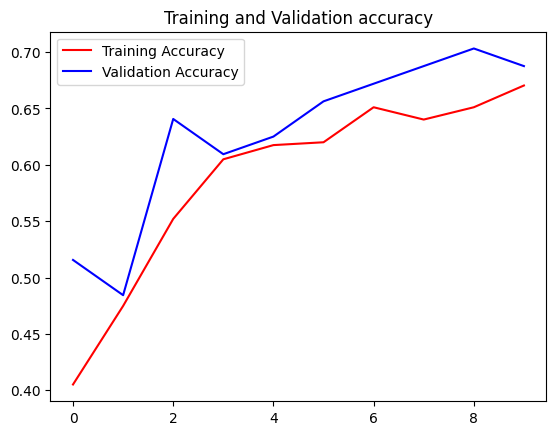

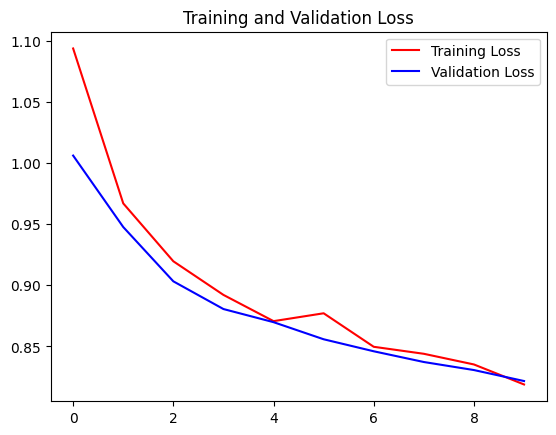

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.show()

# Menampilkan precission, recall, dan f1-score

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluasi model
y_true = valid_dataset.classes
Y_pred = modelku.predict(valid_dataset, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Tampilkan laporan klasifikasi
target_names = list(valid_dataset.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# CONFUSION MATRIX

3/3 [==============================] - 2s 179ms/step


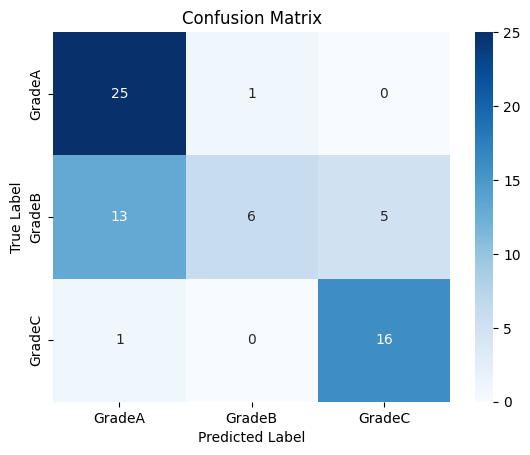

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_list = os.listdir(train_dir)

# membuat prediksi pada data validasi
y_pred = modelku.predict(valid_dataset)
y_pred = np.argmax(y_pred, axis=1)

# mengambil label yang sebenarnya
y_true = valid_dataset.classes

# membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# menampilkan confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_list, yticklabels=class_list)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Export TFLITE

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('model\modelku-fit.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('modelku-fit.tflite', 'wb') as f:
    f.write(tflite_model)

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model("model\modelku-fit_data-baru_59.h5") # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('export-3_blob-fit_no-dropout_59-quant.tflite', 'wb') as f:
#   f.write(tflite_model)

# TES Klasifikasi

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

class_list = os.listdir(train_dir)

img_path = 'validasi\GradeB\imageB_432977.bmp'
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = modelku.predict(x)
class_idx = np.argmax(preds[0])
class_label = class_list[class_idx]

imgplot = plt.imshow(img)
plt.title(f'Predicted Class: {class_label}')
plt.axis('off')
plt.show()